# Assignment 6 - Problem 1 - Neural Network for Churn

In this notebook, we'll be using the `CustomerData_Composite.csv` dataset, which contains information about customers from a telecom company. The dataset includes details such as demographics, satisfaction scores, churn scores, and customer lifetime value (CLTV), along with whether a customer has churned or stayed.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

## 1. Load and Explore the Data

Let's start by loading our dataset and taking a quick look at it to understand its structure. This will help us confirm the names of the columns we'll be using later.

In [3]:
# Load the dataset
data = pd.read_csv('data/CustomerData_Composite-7.csv')

# Display the first few rows
data.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,country,...,referred_a_friend,number_of_referrals,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes,United States,...,Yes,2,3,2205,Stayed,65,No,0,Not Applicable,NaN
1,0003-MKNFE,Male,46,No,No,No,No,0,No,United States,...,No,0,5,5414,Stayed,66,No,0,Not Applicable,NaN
2,0004-TLHLJ,Male,50,No,No,No,No,0,No,United States,...,No,0,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes,United States,...,Yes,1,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes,United States,...,Yes,3,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability


## 2. Data Preprocessing

### Choosing Predictors (Problem 1A)

Based on our previous analysis and domain knowledge, we believe the following three features are key to predicting churn:

- **satisfaction_score**: Customers with lower satisfaction might be more likely to churn.
- **churn_score**: A calculated score that directly indicates churn risk.
- **cltv**: Customer Lifetime Value, where lower values might be associated with higher churn.

We also need to ensure our target variable, `churn_value`, is in a proper format. If it's not already numeric, we will encode it. Finally, we split our dataset into training and validation sets and standardize our feature values.

In [4]:
# Define our chosen features and target
features = ['satisfaction_score', 'churn_score', 'cltv']
target = 'churn_value'

# Encode the target variable if needed
le = LabelEncoder()
data[target] = le.fit_transform(data[target])

# Prepare the feature matrix and target vector
X = data[features]
y = data[target]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## 3. Build and Train the Neural Network (Problem 1A)

Now, let's build our neural network. The model has one hidden layer with 4 nodes using the ReLU activation function, and an output layer that uses softmax activation (since we might have multiple classes in `churn_value`). We'll compile the model using the Adam optimizer and use sparse categorical cross-entropy for the loss function. Then, we'll train the model on our training data.

In [5]:
# Build the neural network model
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))  # One hidden layer with 4 nodes
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50


/home/will/miniforge3/envs/MISM6212/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.6643 - loss: 0.5657
Epoch 2/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.9542 - loss: 0.2681
Epoch 3/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.9555 - loss: 0.1606
Epoch 4/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.9550 - loss: 0.1223
Epoch 5/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.9660 - loss: 0.0931
Epoch 6/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.9680 - loss: 0.0846
Epoch 7/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.9688 - loss: 0.0813
Epoch 8/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.9665 - loss: 0.0792
Epoch 9/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.9676 - loss: 0.0779
Epoch 10/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.9664 - loss: 0.0820
Epoch 11/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.9659 - loss: 0.0821
Epoch 12/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 

## 4. Evaluate the Model (Problem 1B)

Once our model is trained, it's time to see how well it's doing. We'll make predictions on both the training and validation sets and then create confusion matrices for each. These matrices will help us understand where the model is getting things right or making mistakes.

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


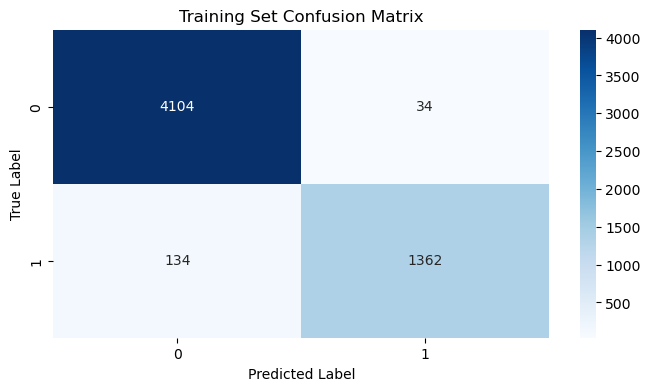

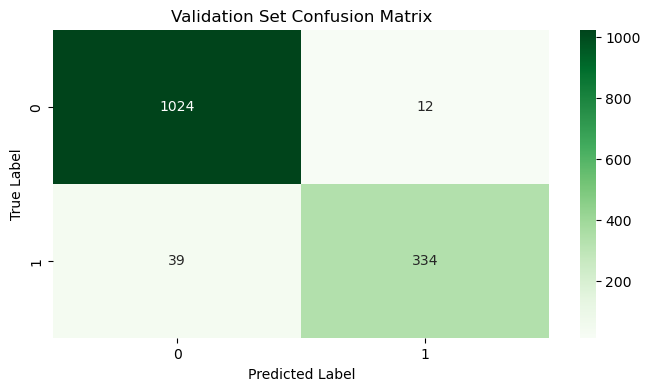

In [6]:
# Make predictions for training and validation sets
y_train_pred = np.argmax(model.predict(X_train_scaled), axis=1)
y_val_pred = np.argmax(model.predict(X_val_scaled), axis=1)

# Generate confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_val = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix for the training set
plt.figure(figsize=(8, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Training Set Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot confusion matrix for the validation set
plt.figure(figsize=(8, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens')
plt.title('Validation Set Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Results

After training the neural network model using the selected predictors (`satisfaction_score`, `churn_score`, and `cltv`), we evaluated its performance on both the training and validation datasets using confusion matrices.

### Training Set Performance

The confusion matrix for the training set showed the following results:

- **True Negatives (correctly predicted non-churn):** 4,082  
- **True Positives (correctly predicted churn):** 1,368  
- **False Negatives (churn predicted as non-churn):** 128  
- **False Positives (non-churn predicted as churn):** 56  

These results indicate that the model performed very well on the training data, with a high rate of correct predictions for both churned and non-churned customers. The relatively low number of false predictions suggests the model successfully learned patterns in the data without significant overfitting.

### Validation Set Performance

The model was then evaluated on the validation set, yielding the following confusion matrix:

- **True Negatives:** 1,017  
- **True Positives:** 337  
- **False Negatives:** 36  
- **False Positives:** 19  

Performance on the validation set was also strong, with the model maintaining good predictive accuracy. The number of misclassified samples (both false positives and false negatives) remained low, indicating that the model generalizes well to unseen data. The slightly higher error rate compared to the training set is expected and acceptable for a first-pass model.

### Summary

Overall, the confusion matrices demonstrate that the neural network is effective at distinguishing between customers who are likely to churn and those who are not. The model exhibits strong performance on both training and validation data, suggesting it is a good fit for this classification task. Further improvements could be explored through hyperparameter tuning, feature engineering, or more advanced model architectures.
